In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [2]:
import yfinance as yf
data = yf.download("^IXIC")
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1971-02-05,100.000000,100.000000,100.000000,100.000000,100.000000,0
1971-02-08,100.839996,100.839996,100.839996,100.839996,100.839996,0
1971-02-09,100.760002,100.760002,100.760002,100.760002,100.760002,0
1971-02-10,100.690002,100.690002,100.690002,100.690002,100.690002,0
1971-02-11,101.449997,101.449997,101.449997,101.449997,101.449997,0
...,...,...,...,...,...,...
2023-05-16,12327.049805,12403.809570,12324.519531,12343.049805,12343.049805,4067510000
2023-05-17,12388.580078,12514.070312,12335.019531,12500.570312,12500.570312,4501820000
2023-05-18,12513.870117,12698.500000,12512.259766,12688.839844,12688.839844,4532890000


In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data["Close"].values.reshape(-1, 1))

In [6]:
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size, :]
test_data = scaled_data[train_size:, :]

In [7]:
def create_dataset(dataset, lookback=1):
    dataX , dataY = [], []
    for i in range(len(dataset)-lookback-1):
        a = dataset[i:(i+lookback), 0]
        dataX.append(a)
        dataY.append(dataset[i + lookback, 0])
    
    return np.array(dataX) , np.array(dataY)

In [11]:
look_back = 30
X_train , Y_train = create_dataset(train_data, look_back)
X_test , Y_test = create_dataset(test_data, look_back)

In [12]:
def create_model():
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(LSTM(units=50))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
    return model

In [13]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [15]:
model = create_model()
model.fit(X_train, Y_train, batch_size=50, epochs=32)

Epoch 1/32
211/211 [==============================] - 7s 21ms/step - loss: 1.6182e-04 - accuracy: 9.5066e-05
Epoch 2/32
211/211 [==============================] - 5s 22ms/step - loss: 1.4420e-05 - accuracy: 9.5066e-05
Epoch 3/32
211/211 [==============================] - 5s 23ms/step - loss: 1.3653e-05 - accuracy: 9.5066e-05
Epoch 4/32
211/211 [==============================] - 5s 22ms/step - loss: 1.1558e-05 - accuracy: 9.5066e-05
Epoch 5/32
211/211 [==============================] - 5s 22ms/step - loss: 1.1205e-05 - accuracy: 9.5066e-05
Epoch 6/32
211/211 [==============================] - 4s 21ms/step - loss: 1.0942e-05 - accuracy: 9.5066e-05
Epoch 7/32
211/211 [==============================] - 5s 23ms/step - loss: 9.6926e-06 - accuracy: 9.5066e-05
Epoch 8/32
211/211 [==============================] - 5s 21ms/step - loss: 9.0506e-06 - accuracy: 9.5066e-05
Epoch 9/32
211/211 [==============================] - 5s 22ms/step - loss: 8.4622e-06 - accuracy: 9.5066e-05
Epoch 10/32
211/211

In [16]:
predictions = model.predict(X_test)

82/82 [==============================] - 1s 7ms/step


In [17]:
predictions = scaler.inverse_transform(predictions)
Y_test = scaler.inverse_transform(Y_test.reshape(-1, 1))

In [20]:
rmse = np.sqrt(np.mean(predictions - Y_test) ** 2)
print("Root Mean Squared Error : ", rmse)

Root Mean Squared Error :  140.10056374289772


In [21]:
mean_price = np.mean(data["Close"].values)
percentage_error = rmse / mean_price * 100
print("Percebtage Error : ", percentage_error)

Percebtage Error :  5.839250302456611


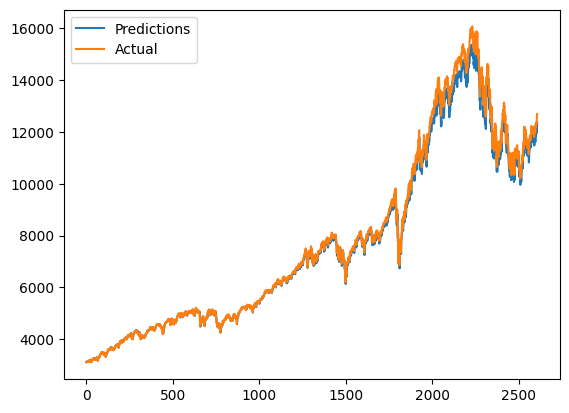

In [22]:
import matplotlib.pyplot as plt
plt.plot(predictions, label = "Predictions")
plt.plot(Y_test, label="Actual")
plt.legend()
plt.show()